### Importación de datos



In [40]:
import pandas as pd
#from sklearn.preprocessing import MinMaxScaler # Import the MinMaxScaler


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [41]:
# Calcular ingresos totales por tienda
ingreso_tienda = tienda['Precio'].sum()
ingreso_tienda2 = tienda2['Precio'].sum()
ingreso_tienda3 = tienda3['Precio'].sum()
ingreso_tienda4 = tienda4['Precio'].sum()

# Mostrar los ingresos
print(f"Ingreso total tienda 1: ${int(ingreso_tienda):,}".replace(",", "."))
print(f"Ingreso total tienda 2: ${int(ingreso_tienda2):,}".replace(",", "."))
print(f"Ingreso total tienda 3: ${int(ingreso_tienda3):,}".replace(",", "."))
print(f"Ingreso total tienda 4: ${int(ingreso_tienda4):,}".replace(",", "."))



Ingreso total tienda 1: $1.150.880.400
Ingreso total tienda 2: $1.116.343.500
Ingreso total tienda 3: $1.098.019.600
Ingreso total tienda 4: $1.038.375.700


# 2. Ventas por categoría

In [42]:
productos_categoria_tienda1 = tienda.groupby('Categoría del Producto').size().reset_index(name='Cantidad de ventas').sort_values(by='Cantidad de ventas', ascending=False)
productos_categoria_tienda2 = tienda2.groupby('Categoría del Producto').size().reset_index(name='Cantidad de ventas').sort_values(by='Cantidad de ventas', ascending=False)
productos_categoria_tienda3 = tienda3.groupby('Categoría del Producto').size().reset_index(name='Cantidad de ventas').sort_values(by='Cantidad de ventas', ascending=False)
productos_categoria_tienda4 = tienda4.groupby('Categoría del Producto').size().reset_index(name='Cantidad de ventas').sort_values(by='Cantidad de ventas', ascending=False)

# Mostrar las categorías más populares de cada tienda
print("Categorías más populares tienda 1:")
print(productos_categoria_tienda1)

print("\nCategorías más populares tienda 2:")
print(productos_categoria_tienda2)

print("\nCategorías más populares tienda 3:")
print(productos_categoria_tienda3)

print("\nCategorías más populares tienda 4:")
print(productos_categoria_tienda4)

Categorías más populares tienda 1:
    Categoría del Producto  Cantidad de ventas
7                  Muebles                 465
3             Electrónicos                 448
5                 Juguetes                 324
2        Electrodomésticos                 312
1     Deportes y diversión                 284
4   Instrumentos musicales                 182
6                   Libros                 173
0  Artículos para el hogar                 171

Categorías más populares tienda 2:
    Categoría del Producto  Cantidad de ventas
7                  Muebles                 442
3             Electrónicos                 422
5                 Juguetes                 313
2        Electrodomésticos                 305
1     Deportes y diversión                 275
4   Instrumentos musicales                 224
6                   Libros                 197
0  Artículos para el hogar                 181

Categorías más populares tienda 3:
    Categoría del Producto  Cantidad de ventas


# 3. Calificación promedio de la tienda


In [43]:
# Calcular la calificación promedio de cada tienda
calificacion_promedio_tienda1 = tienda['Calificación'].mean()
calificacion_promedio_tienda2 = tienda2['Calificación'].mean()
calificacion_promedio_tienda3 = tienda3['Calificación'].mean()
calificacion_promedio_tienda4 = tienda4['Calificación'].mean()

# Mostrar las calificaciones promedio
print(f"Calificación promedio tienda 1: {calificacion_promedio_tienda1:.2f}")
print(f"Calificación promedio tienda 2: {calificacion_promedio_tienda2:.2f}")
print(f"Calificación promedio tienda 3: {calificacion_promedio_tienda3:.2f}")
print(f"Calificación promedio tienda 4: {calificacion_promedio_tienda4:.2f}")

Calificación promedio tienda 1: 3.98
Calificación promedio tienda 2: 4.04
Calificación promedio tienda 3: 4.05
Calificación promedio tienda 4: 4.00


# 4. Productos más y menos vendidos

In [44]:
import matplotlib.pyplot as plt

# Agrupar por 'Producto' y contar la cantidad de veces que cada producto se vendió
ventas_producto_tienda1 = tienda.groupby('Producto').size().reset_index(name='Cantidad de ventas').sort_values(by='Cantidad de ventas', ascending=False)
ventas_producto_tienda2 = tienda2.groupby('Producto').size().reset_index(name='Cantidad de ventas').sort_values(by='Cantidad de ventas', ascending=False)
ventas_producto_tienda3 = tienda3.groupby('Producto').size().reset_index(name='Cantidad de ventas').sort_values(by='Cantidad de ventas', ascending=False)
ventas_producto_tienda4 = tienda4.groupby('Producto').size().reset_index(name='Cantidad de ventas').sort_values(by='Cantidad de ventas', ascending=False)

# Mostrar los productos más y menos vendidos
print("Productos más vendidos tienda 1:")
print(ventas_producto_tienda1.head(1))  # Mostrar los 10 más vendidos

print("\nProductos menos vendidos tienda 1:")
print(ventas_producto_tienda1.tail(1))  # Mostrar los 10 menos vendidos

print("\nProductos más vendidos tienda 2:")
print(ventas_producto_tienda2.head(1))  # Mostrar los 10 más vendidos

print("\nProductos menos vendidos tienda 2:")
print(ventas_producto_tienda2.tail(1))  # Mostrar los 10 menos vendidos

print("\nProductos más vendidos tienda 3:")
print(ventas_producto_tienda3.head(1))  # Mostrar los 10 más vendidos

print("\nProductos menos vendidos tienda 3:")
print(ventas_producto_tienda3.tail(1))

print("\nProductos más vendidos tienda 4:")
print(ventas_producto_tienda4.head(1))  # Mostrar los 10 más vendidos

print("\nProductos menos vendidos tienda 4:")
print(ventas_producto_tienda4.tail(1))



Productos más vendidos tienda 1:
  Producto  Cantidad de ventas
1  Armario                  60

Productos menos vendidos tienda 1:
                    Producto  Cantidad de ventas
4  Auriculares con micrófono                  33

Productos más vendidos tienda 2:
                     Producto  Cantidad de ventas
24  Iniciando en programación                  65

Productos menos vendidos tienda 2:
         Producto  Cantidad de ventas
26  Juego de mesa                  32

Productos más vendidos tienda 3:
         Producto  Cantidad de ventas
27  Kit de bancas                  57

Productos menos vendidos tienda 3:
                  Producto  Cantidad de ventas
9  Bloques de construcción                  35

Productos más vendidos tienda 4:
    Producto  Cantidad de ventas
10  Cama box                  62

Productos menos vendidos tienda 4:
              Producto  Cantidad de ventas
22  Guitarra eléctrica                  33


# 5. Envío promedio por tienda

In [45]:
# Calcular el costo de envío promedio para cada tienda
costo_envio_promedio_tienda1 = tienda['Costo de envío'].mean()
costo_envio_promedio_tienda2 = tienda2['Costo de envío'].mean()
costo_envio_promedio_tienda3 = tienda3['Costo de envío'].mean()
costo_envio_promedio_tienda4 = tienda4['Costo de envío'].mean()

# Mostrar los resultados
print(f"Costo de envío promedio tienda 1: ${int(costo_envio_promedio_tienda1):,}".replace(",", "."))
print(f"Costo de envío promedio tienda 2: ${int(costo_envio_promedio_tienda2):,}".replace(",", "."))
print(f"Costo de envío promedio tienda 3: ${int(costo_envio_promedio_tienda3):,}".replace(",", "."))
print(f"Costo de envío promedio tienda 4: ${int(costo_envio_promedio_tienda4):,}".replace(",", "."))



Costo de envío promedio tienda 1: $26.018
Costo de envío promedio tienda 2: $25.216
Costo de envío promedio tienda 3: $24.805
Costo de envío promedio tienda 4: $23.459


#Graficos

###Ingresos Totales por Tienda

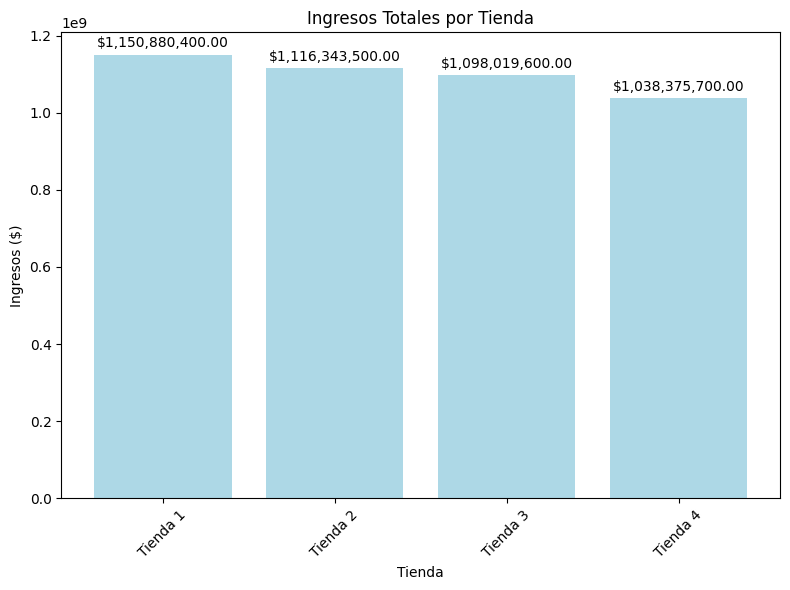

In [46]:
import matplotlib.pyplot as plt

# Calcular los ingresos totales de cada tienda
ingresos_tienda1 = tienda['Precio'].sum()
ingresos_tienda2 = tienda2['Precio'].sum()
ingresos_tienda3 = tienda3['Precio'].sum()
ingresos_tienda4 = tienda4['Precio'].sum()

# Crear gráfico de barras para los ingresos
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos = [ingresos_tienda1, ingresos_tienda2, ingresos_tienda3, ingresos_tienda4]

plt.figure(figsize=(8, 6))
barras = plt.bar(tiendas, ingresos, color='lightblue')
plt.title('Ingresos Totales por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingresos ($)')
plt.xticks(rotation=45)

# Mostrar valores encima de cada barra
for barra in barras:
    y = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, y + y*0.01, f'${y:,.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


###Costo de Envío vs Calificación Promedio por Tienda

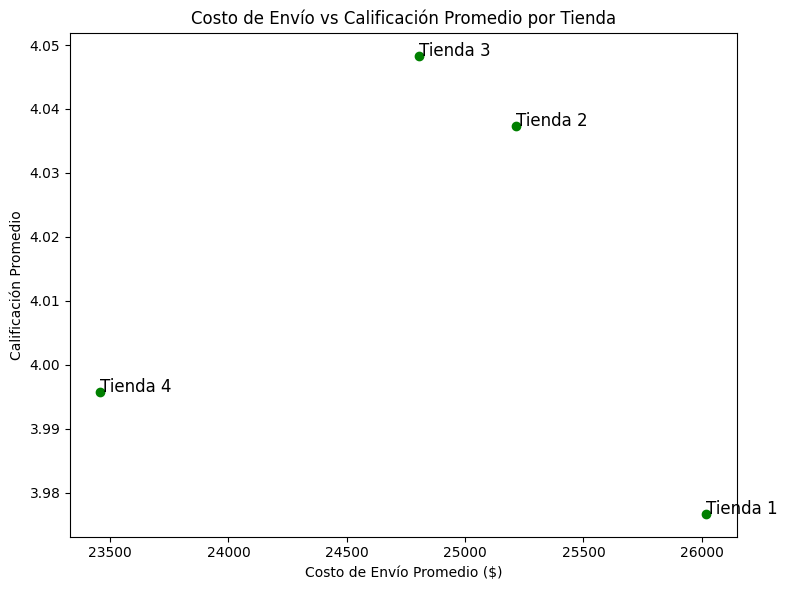

In [47]:
# Calcular costo de envío promedio y calificación promedio
costo_envio_promedio_tienda1 = tienda['Costo de envío'].mean()
costo_envio_promedio_tienda2 = tienda2['Costo de envío'].mean()
costo_envio_promedio_tienda3 = tienda3['Costo de envío'].mean()
costo_envio_promedio_tienda4 = tienda4['Costo de envío'].mean()

calificacion_promedio_tienda1 = tienda['Calificación'].mean()
calificacion_promedio_tienda2 = tienda2['Calificación'].mean()
calificacion_promedio_tienda3 = tienda3['Calificación'].mean()
calificacion_promedio_tienda4 = tienda4['Calificación'].mean()

# Crear gráfico de dispersión
costo_envio_promedio = [costo_envio_promedio_tienda1, costo_envio_promedio_tienda2, costo_envio_promedio_tienda3, costo_envio_promedio_tienda4]
calificacion_promedio = [calificacion_promedio_tienda1, calificacion_promedio_tienda2, calificacion_promedio_tienda3, calificacion_promedio_tienda4]

plt.figure(figsize=(8, 6))
plt.scatter(costo_envio_promedio, calificacion_promedio, color='green')
plt.title('Costo de Envío vs Calificación Promedio por Tienda')
plt.xlabel('Costo de Envío Promedio ($)')
plt.ylabel('Calificación Promedio')
for i, tienda in enumerate(tiendas):
    plt.text(costo_envio_promedio[i] + 0.1, calificacion_promedio[i], tiendas[i], fontsize=12)

plt.tight_layout()
plt.show()


###Distribución de Categorías de Productos

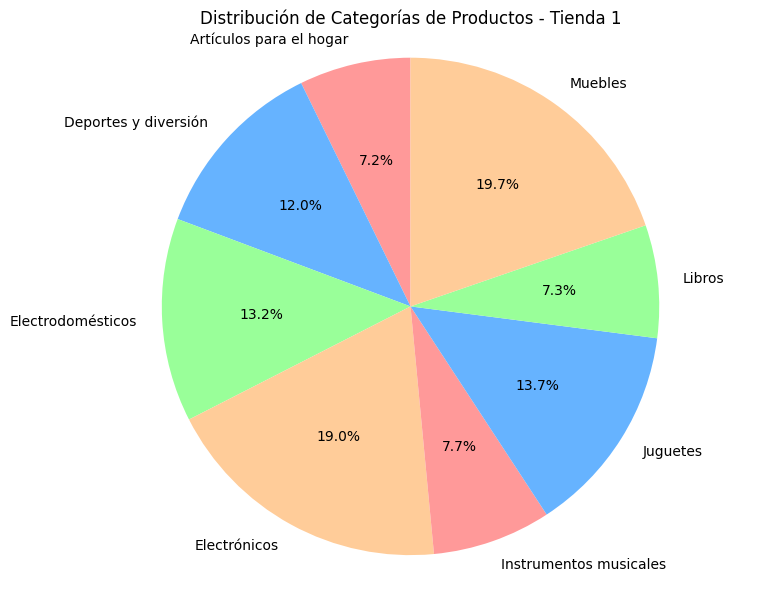

In [48]:

# URLs de los datos
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.columns = tienda.columns.str.strip()
tienda2.columns = tienda2.columns.str.strip()
tienda3.columns = tienda3.columns.str.strip()
tienda4.columns = tienda4.columns.str.strip()

# Agrupar por categoría y contar las ventas por categoría en cada tienda
categorias_tienda1 = tienda.groupby('Categoría del Producto').size().reset_index(name='Cantidad de ventas')

# Crear gráfico de pastel para la distribución de categorías en Tienda 1
plt.figure(figsize=(8, 6))
plt.pie(categorias_tienda1['Cantidad de ventas'], labels=categorias_tienda1['Categoría del Producto'],
        autopct='%1.1f%%', startangle=90,
        colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Distribución de Categorías de Productos - Tienda 1')
plt.axis('equal')  # Mantener forma circular
plt.tight_layout()
plt.show()

#Informe de Análisis de Ventas de Tiendas

##Introducción

###Este informe tiene como objetivo proporcionar una recomendación al Sr. Juan sobre cuál tienda debería considerar para comenzar a vender, basándose en diversos factores de rendimiento. Para ello, hemos analizado los ingresos totales, las categorías de productos, las calificaciones promedio de los clientes y los costos de envío de las cuatro tiendas. A continuación, se presentan los hallazgos clave a partir de los datos, respaldados por visualizaciones.




##Desarrollo

##1. Ingresos Totales por Tienda

El análisis de los ingresos totales revela que:

tienda 1: $1.150.880.400

tienda 2: $1.116.343.500

tienda 3: $1.098.019.600

tienda 4: $1.038.375.700

La Tienda 1 es la que genera los mayores ingresos totales, seguida por la Tienda 2, la Tienda 3 y la Tienda 4. Esto sugiere que la Tienda 1 tiene una mayor participación en el mercado y podría ser una buena opción si el Sr. Juan busca un volumen de ventas alto.

## 2. categorías de productos más y menos vendidas

En general, la categoría "Muebles" es la más vendida en todas las tiendas, seguida de "Artículos para el hogar" o "Instrumentos musicales". Este patrón indica una tendencia de preferencia del público por productos de hogar.

La tienda 3 presenta la mayor cantidad de ventas en la categoría "Muebles" (499 unidades), lo cual demuestra una fuerte demanda en ese segmento.

La tienda 2 muestra también una diversidad con buena venta de "Artículos para el hogar".

###Detalle:

* Categorías más populares tienda 1:
Categoría del Producto "Muebles" Cantidad de ventas 465
Categoría del Producto "Artículos para el hogar"  Cantidad de ventas 171

* Categorías más populares tienda 2:
Categoría del Producto "Muebles" Cantidad de ventas 442
Categoría del Producto "Artículos para el hogar"  Cantidad de ventas 181


* Categorías más populares tienda 3:
Categoría del Producto "Muebles" Cantidad de ventas 499
Categoría del Producto "Artículos para el hogar" y "Instrumentos musicales" Cantidad de ventas 177

* Categorías más populares tienda 4:
Categoría del Producto "Muebles" Cantidad de ventas 480
Categoría del Producto "Instrumentos musicales"  Cantidad de ventas 170

## 3. calificaciones promedio de los clientes por tienda.

Aunque la diferencia entre las calificaciones es leve, la tienda 3 destaca con la puntuación más alta (4.05), lo que refleja una mejor experiencia de compra y satisfacción del cliente.

###Detalle:

* Calificación promedio tienda 1: 3.98

* Calificación promedio tienda 2: 4.04

* Calificación promedio tienda 3: 4.05

* Calificación promedio tienda 4: 4.00



## 4. productos más y menos vendidos.

La tienda 2 tiene el producto más vendido entre todas (65 unidades), lo que indica un producto estrella con alta demanda, lo cual podría ser una ventaja para posicionar nuevos productos relacionados.

###Detalle:

* Productos más vendidos tienda 1   Producto Armario Cantidad de ventas 60              

* Productos menos vendidos tienda 1 Producto Auriculares con micrófono  Cantidad de ventas 33               

* Productos más vendidos tienda 2  Producto Iniciando en programación Cantidad de ventas 65                    

* Productos menos vendidos tienda 2 Producto Juego de mesa Cantidad de ventas 32              

* Productos más vendidos tienda 3 Producto Kit de bancas  Cantidad de ventas 57                  

* Productos menos vendidos tienda 3 Producto Bloques de construcción   Cantidad de ventas 35                 

* Productos más vendidos tienda 4 Producto Cama box  Cantidad de ventas 62

* Productos menos vendidos tienda 4 Producto Guitarra eléctrica  Cantidad de ventas 33

* El producto mas vendido es el de la tienda 2 que corresponde a "Iniciando en programación" con una cantidad de 65

* El producto menos vendido es el de la tienda 2 que corresponde a "Juego de mesa" con una cantidad de 32

## 5. El coste de envío promedio para cada tienda.

La tienda 4 tiene el menor costo de envío, lo que podría traducirse en mayores márgenes de ganancia o precios más competitivos para el cliente final.

###Detalle

* Costo de envío promedio tienda 1: $26.018

* Costo de envío promedio tienda 2: $25.216

* Costo de envío promedio tienda 3: $24.805

* Costo de envío promedio tienda 4: $23.459

##Conclusión y Recomendación

Después de evaluar todos los factores clave, recomendamos que el Sr. Juan venda sus productos en la Tienda 2. A continuación se detallan las razones que respaldan esta decisión:

* Buen desempeño general: Aunque no lidera en todos los aspectos, la tienda 2 se mantiene en el segundo lugar en ingresos totales, mostrando un mercado robusto.

* Mayor venta de producto individual: El producto Iniciando en programación alcanzó 65 unidades vendidas, lo cual es la cifra más alta entre todos los productos analizados, evidenciando una alta rotación y aceptación.

* Excelente calificación de clientes: Con una puntuación de 4.04, la tienda 2 garantiza una buena experiencia al comprador, lo que puede generar confianza y fidelización.

* Costo de envío competitivo: Aunque no es el más bajo, el costo de envío promedio es menor que en la tienda 1, lo que puede influir positivamente en la decisión de compra.



## Consideraciones Finales

Si bien la tienda 1 posee mayores ingresos, también presenta desventajas como una calificación más baja (3.98) y el costo de envío más alto. Por otro lado, la tienda 3 tiene mejor calificación, pero menores ingresos y productos menos vendidos.

La tienda 2 presenta un equilibrio sólido entre ingresos, satisfacción del cliente y volumen de ventas, lo cual la convierte en la opción más estratégica para el Sr. Juan.